In [ ]:
!pip install adjustText
# Data from here:
# https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from adjustText import adjust_text
from matplotlib.ticker import ScalarFormatter

import glob
import os

  Created wheel for adjustText: filename=adjustText-0.7.3-cp36-none-any.whl size=7099 sha256=4a7bc4d895731b2eb2ac879ffca52a35cd50505e77f3438d3e39172389ab9f5d
  Stored in directory: /root/.cache/pip/wheels/41/95/74/7d347e136d672f8bc28e937032bc92baf4f80856763a7e7b72
Successfully built adjustText


In [ ]:
# READ, RENAME
covid = pd.read_excel("COVID-19-geographic-disbtribution-worldwide-2020-08-27.xlsx")
# REPLACED WITH THE CODE BELOW THAT EXTRACTS THE LATEST .xlsx FILE IN THE FOLDER

# list_of_files = glob.glob('C:\\Users\\nikan\\Desktop\\COVID_daily/*xlsx') # * means all if need specific format then *.csv
# latest_file = max(list_of_files, key=os.path.getctime)
# print(latest_file)
# covid = pd.read_excel(latest_file) 

covid.rename(columns = {'dateRep': 'DateRep', 'day':'Day', 'month':'Month','year':'Year','cases':'Cases','deaths':'Deaths', 'popData2019':'Population', 'countriesAndTerritories': 'Country', 'continentExp':'Continent'}, inplace = True)
covid

,DateRep,Day,Month,Year,Cases,Deaths,Country,geoId,countryterritoryCode,Population,Continent,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-08-27,27,8,2020,55,4,Afghanistan,AF,AFG,38041757.0,Asia,2.053007
1,2020-08-26,26,8,2020,1,0,Afghanistan,AF,AFG,38041757.0,Asia,2.108210
2,2020-08-25,25,8,2020,71,10,Afghanistan,AF,AFG,38041757.0,Asia,2.670749
3,2020-08-24,24,8,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,2.484112
4,2020-08-23,23,8,2020,105,2,Afghanistan,AF,AFG,38041757.0,Asia,2.484112
...,...,...,...,...,...,...,...,...,...,...,...,...
38906,2020-03-25,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
38907,2020-03-24,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
38908,2020-03-23,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
38909,2020-03-22,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN


In [ ]:
covid_daily_per_continent = covid.groupby(['DateRep','Continent'])[['Cases', 'Deaths']].sum()
covid_daily_per_continent

Cases  Deaths
DateRep    Continent                
2019-12-31 Africa          0       0
           America         0       0
           Asia           27       0
           Europe          0       0
           Oceania         0       0
...                      ...     ...
2020-08-27 Africa       8870     321
           America    132035    3953
           Asia       103082    1597
           Europe      23931     394
           Oceania       338      24

[1269 rows x 2 columns]

In [ ]:
covid_daily_per_continent_cumulative = covid_daily_per_continent.groupby(['Continent']).cumsum()
covid_daily_per_continent.reset_index(inplace=True)
covid_daily_per_continent_cumulative.reset_index(inplace=True)
covid_daily_per_continent_cumulative

,DateRep,Continent,Cases,Deaths
0,2019-12-31,Africa,0,0
1,2019-12-31,America,0,0
2,2019-12-31,Asia,27,0
3,2019-12-31,Europe,0,0
4,2019-12-31,Oceania,0,0
...,...,...,...,...
1264,2020-08-27,Africa,1212699,28609
1265,2020-08-27,America,12910547,455566
1266,2020-08-27,Asia,6529270,133503
1267,2020-08-27,Europe,3522921,207818


In [ ]:
covid_daily_global = covid.groupby(['DateRep'])[['Cases', 'Deaths']].sum()
covid_daily_global.reset_index(inplace=True)
covid_daily_global

,DateRep,Cases,Deaths
0,2019-12-31,27,0
1,2020-01-01,0,0
2,2020-01-02,0,0
3,2020-01-03,17,0
4,2020-01-04,0,0
...,...,...,...
236,2020-08-23,266465,5633
237,2020-08-24,224497,3322
238,2020-08-25,220357,4538
239,2020-08-26,254705,6374


In [ ]:
covid_daily_global_cumulative = covid.groupby(['DateRep'])[['Cases', 'Deaths']].sum().cumsum()
covid_daily_global_cumulative.reset_index(inplace=True)
covid_daily_global_cumulative

,DateRep,Cases,Deaths
0,2019-12-31,27,0
1,2020-01-01,27,0
2,2020-01-02,27,0
3,2020-01-03,44,0
4,2020-01-04,44,0
...,...,...,...
236,2020-08-23,23236871,805567
237,2020-08-24,23461368,808889
238,2020-08-25,23681725,813427
239,2020-08-26,23936430,819801


In [ ]:
Africa = covid_daily_per_continent[covid_daily_per_continent['Continent']=='Africa']
Africa['mov_avg'] = Africa['Cases'].rolling(window=7).mean()
America = covid_daily_per_continent[covid_daily_per_continent['Continent']=='America']
America['mov_avg'] = America['Cases'].rolling(window=7).mean()
Asia = covid_daily_per_continent[covid_daily_per_continent['Continent']=='Asia']
Asia['mov_avg'] = Asia['Cases'].rolling(window=7).mean()
Europe = covid_daily_per_continent[covid_daily_per_continent['Continent']=='Europe']
Europe['mov_avg'] = Europe['Cases'].rolling(window=7).mean()
Oceania = covid_daily_per_continent[covid_daily_per_continent['Continent']=='Oceania']
Oceania['mov_avg'] = Oceania['Cases'].rolling(window=7).mean()

covid_daily_global['mov_avg'] = covid_daily_global['Cases'].rolling(window=7).mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

In [ ]:
# TO CONVERT THE MILLIONS IN THE Y-AXIS TO 1M, 2M, etc
from matplotlib.ticker import FuncFormatter
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.0fM' % (x * 1e-6)
formatter_mil = FuncFormatter(millions)

# TO CONVERT THE THOUSANDS IN THE Y-AXIS TO 1K, 2K, etc
def thousands(x, pos):
    'The two args are the value and tick position'
    return '%1.0fk' % (x * 1e-3)
formatter_kil = FuncFormatter(thousands)

In [ ]:
# TO PLOT MTH IN THE X-AXIS
# Set the locator
locator = mdates.MonthLocator()  # every month
# Specify the format - %b gives us Jan, Feb...
fmt = mdates.DateFormatter('%b')

In [ ]:
last_day_covid = covid_daily_per_continent[covid_daily_per_continent['DateRep'] == covid_daily_per_continent['DateRep'].max()]
last_day_covid_cumulative = covid_daily_per_continent_cumulative[covid_daily_per_continent_cumulative['DateRep'] == covid_daily_per_continent_cumulative['DateRep'].max()]
continents = last_day_covid['Continent'].to_list()

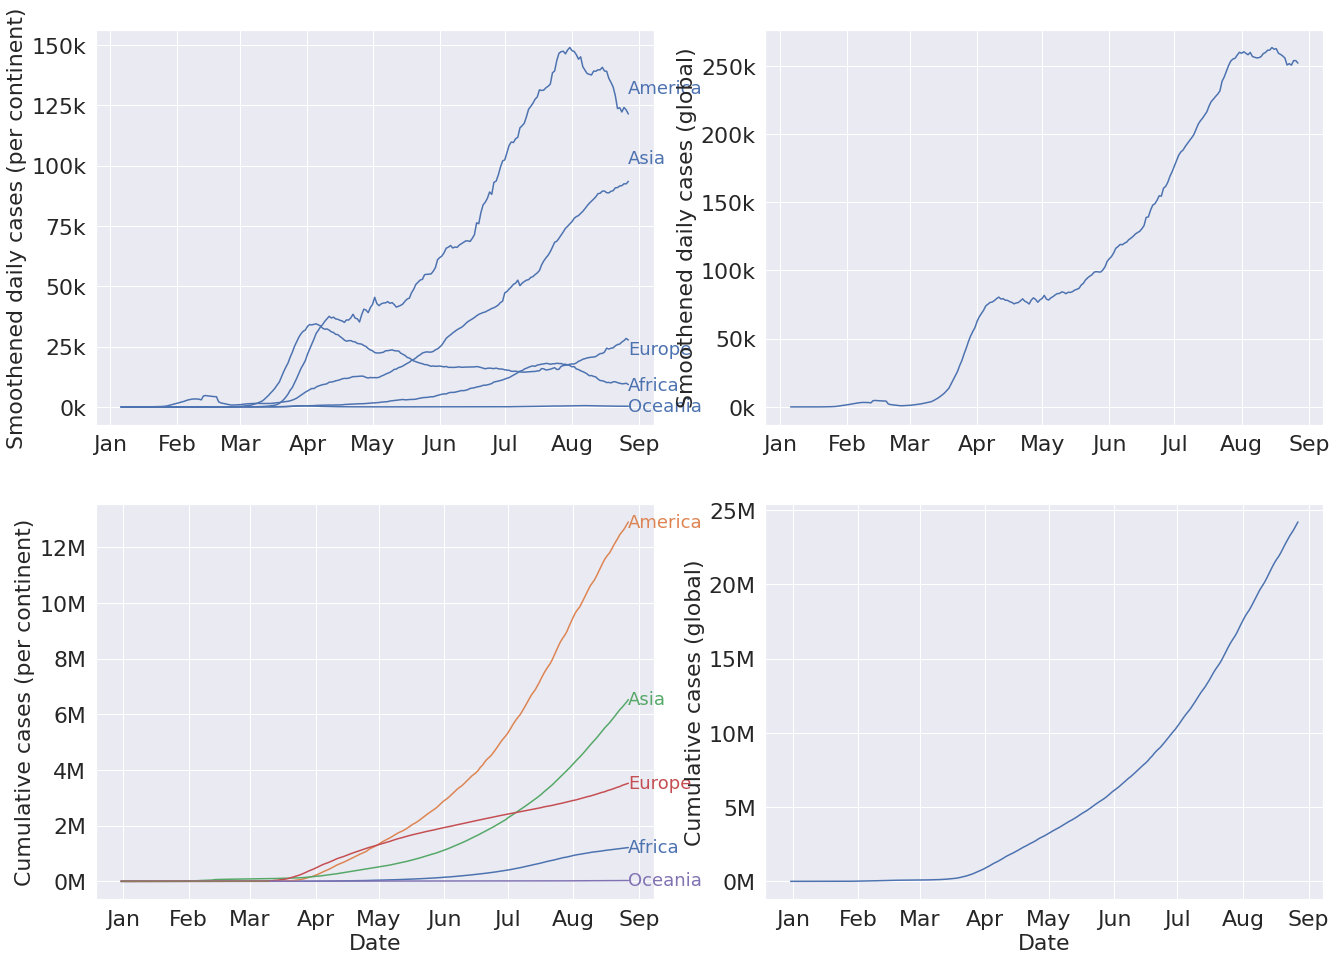

In [ ]:
sns.set(rc={'figure.figsize':(22,16)}, font_scale = 2)
fig, axes = plt.subplots(2, 2)
ax1 = sns.lineplot(x="DateRep", y="mov_avg", hue="Continent", data=Africa, markers=True, legend=False, ax=axes[0, 0]) 
ax1 = sns.lineplot(x="DateRep", y="mov_avg", hue="Continent", data=America, markers=True, legend=False, ax=axes[0, 0]) 
ax1 = sns.lineplot(x="DateRep", y="mov_avg", hue="Continent", data=Asia, markers=True, legend=False, ax=axes[0, 0]) 
ax1 = sns.lineplot(x="DateRep", y="mov_avg", hue="Continent", data=Europe, markers=True, legend=False, ax=axes[0, 0]) 
ax1 = sns.lineplot(x="DateRep", y="mov_avg", hue="Continent", data=Oceania, markers=True, legend=False, ax=axes[0, 0]) 
texts1 = [axes[0, 0].text(last_day_covid.loc[last_day_covid['Continent'] == str(continent)]['DateRep'], last_day_covid.loc[last_day_covid['Continent'] == str(continent)]['Cases'], str(continent), fontsize=18, color=ax1.get_lines()[continents.index(continent)].get_c(), ha = 'left', va = 'center') for continent in continents]
# adjust_text(texts)
axes[0, 0].set_ylabel("Smoothened daily cases (per continent)",fontsize=22)
axes[0, 0].set_xlabel("",fontsize=22)
ax1.yaxis.set_major_formatter(formatter_kil)
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(fmt)

ax2 = sns.lineplot(x="DateRep", y="Cases", hue="Continent", data=covid_daily_per_continent_cumulative, markers=True, legend=False, ax=axes[1, 0]) #, hue_order=countries_1_5
texts2 = [axes[1, 0].text(last_day_covid_cumulative.loc[last_day_covid_cumulative['Continent'] == str(continent)]['DateRep'], last_day_covid_cumulative.loc[last_day_covid_cumulative['Continent'] == str(continent)]['Cases'], str(continent), fontsize=18, color=ax2.get_lines()[continents.index(continent)].get_c(), ha = 'left', va = 'center') for continent in continents]
axes[1, 0].set_ylabel("Cumulative cases (per continent)",fontsize=22)
axes[1, 0].set_xlabel("Date",fontsize=22)
ax2.yaxis.set_major_formatter(formatter_mil)
ax2.xaxis.set_major_locator(locator)
ax2.xaxis.set_major_formatter(fmt)

ax3 = sns.lineplot(x="DateRep", y="mov_avg", data=covid_daily_global, markers=True, legend=False, ax=axes[0, 1]) 
axes[0, 1].set_ylabel("Smoothened daily cases (global)",fontsize=22)
axes[0, 1].set_xlabel("",fontsize=22)
ax3.yaxis.set_major_formatter(formatter_kil)
ax3.xaxis.set_major_locator(locator)
ax3.xaxis.set_major_formatter(fmt)

ax4 = sns.lineplot(x="DateRep", y="Cases", data=covid_daily_global_cumulative, markers=True, legend=False, ax=axes[1, 1]) 
axes[1, 1].set_ylabel("Cumulative cases (global)",fontsize=22)
axes[1, 1].set_xlabel("Date",fontsize=22)
ax4.yaxis.set_major_formatter(formatter_mil)
ax4.xaxis.set_major_locator(locator)
ax4.xaxis.set_major_formatter(fmt)

plt.savefig('Fig_4_1_Desai_Ashutosh.png')

In [ ]:
#Daily mortalities data 
Africa = covid_daily_per_continent[covid_daily_per_continent['Continent']=='Africa']
Africa['mov_avg_d'] = Africa['Deaths'].rolling(window=7).mean()
America = covid_daily_per_continent[covid_daily_per_continent['Continent']=='America']
America['mov_avg_d'] = America['Deaths'].rolling(window=7).mean()
Asia = covid_daily_per_continent[covid_daily_per_continent['Continent']=='Asia']
Asia['mov_avg_d'] = Asia['Deaths'].rolling(window=7).mean()
Europe = covid_daily_per_continent[covid_daily_per_continent['Continent']=='Europe']
Europe['mov_avg_d'] = Europe['Deaths'].rolling(window=7).mean()
Oceania = covid_daily_per_continent[covid_daily_per_continent['Continent']=='Oceania']
Oceania['mov_avg_d'] = Oceania['Deaths'].rolling(window=7).mean()

covid_daily_global['mov_avg_d'] = covid_daily_global['Deaths'].rolling(window=7).mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [ ]:
#Cumulative mortalities data
Africa_cum = covid_daily_per_continent_cumulative[covid_daily_per_continent_cumulative['Continent']=='Africa']
Africa_cum['mov_avg_d'] = Africa_cum['Deaths'].rolling(window=7).mean()
America_cum = covid_daily_per_continent_cumulative[covid_daily_per_continent_cumulative['Continent']=='America']
America_cum['mov_avg_d'] = America_cum['Deaths'].rolling(window=7).mean()
Asia_cum = covid_daily_per_continent_cumulative[covid_daily_per_continent_cumulative['Continent']=='Asia']
Asia_cum['mov_avg_d'] = Asia_cum['Deaths'].rolling(window=7).mean()
Europe_cum = covid_daily_per_continent_cumulative[covid_daily_per_continent_cumulative['Continent']=='Europe']
Europe_cum['mov_avg_d'] = Europe_cum['Deaths'].rolling(window=7).mean()
Oceania_cum = covid_daily_per_continent_cumulative[covid_daily_per_continent_cumulative['Continent']=='Oceania']
Oceania_cum['mov_avg_d'] = Oceania_cum['Deaths'].rolling(window=7).mean()

covid_daily_global_cumulative['mov_avg_d'] = covid_daily_global_cumulative['Deaths'].rolling(window=7).mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

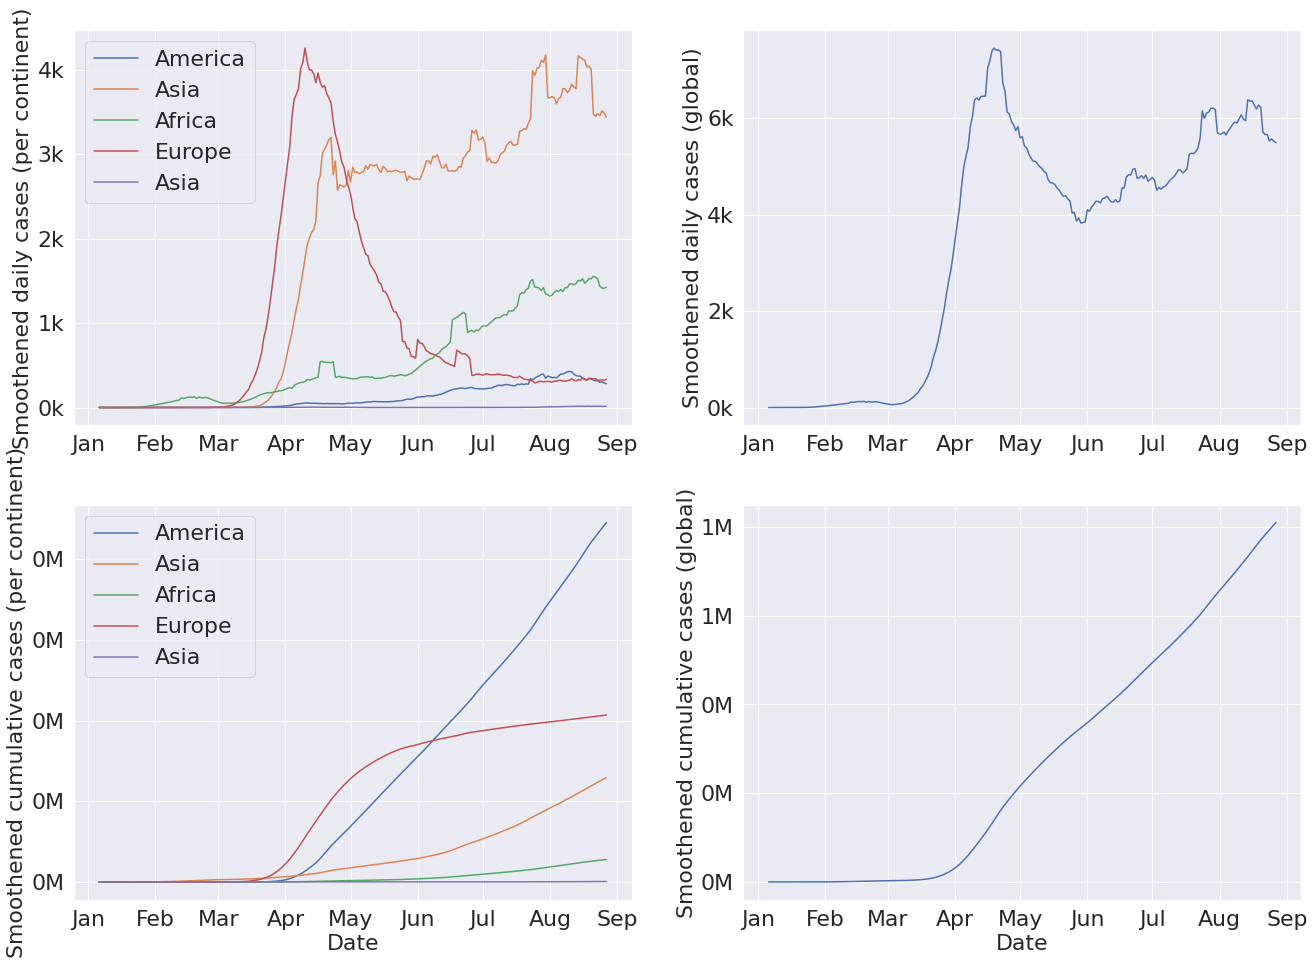

In [ ]:
sns.set(rc={'figure.figsize':(22,16)}, font_scale = 2)
fig, axes = plt.subplots(2, 2)
ax1 = sns.lineplot(x="DateRep", y="mov_avg_d", data=Africa, markers=True, legend=False, ax=axes[0, 0]) 
ax1 = sns.lineplot(x="DateRep", y="mov_avg_d", data=America, markers=True, legend=False, ax=axes[0, 0]) 
ax1 = sns.lineplot(x="DateRep", y="mov_avg_d", data=Asia, markers=True, legend=False, ax=axes[0, 0]) 
ax1 = sns.lineplot(x="DateRep", y="mov_avg_d", data=Europe, markers=True, legend=False, ax=axes[0, 0]) 
ax1 = sns.lineplot(x="DateRep", y="mov_avg_d",  data=Oceania, markers=True, legend=False, ax=axes[0, 0]) 
#texts1 = [axes[0, 0].text(last_day_covid.loc[last_day_covid['Continent'] == str(continent)]['DateRep'], last_day_covid.loc[last_day_covid['Continent'] == str(continent)]['Cases'], str(continent), fontsize=18, color=ax1.get_lines()[continents.index(continent)].get_c(), ha = 'left', va = 'center') for continent in continents]
# adjust_text(texts)
axes[0, 0].set_ylabel("Smoothened daily cases (per continent)",fontsize=22)
axes[0, 0].set_xlabel("",fontsize=22)
ax1.yaxis.set_major_formatter(formatter_kil)
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(fmt)
ax1.legend(['America','Asia','Africa','Europe','Asia'])

ax2 = sns.lineplot(x="DateRep", y="mov_avg_d", data=America_cum, markers=True, legend=False, ax=axes[1, 0])
ax2 = sns.lineplot(x="DateRep", y="mov_avg_d",  data=Asia_cum, markers=True, legend=False, ax=axes[1, 0])
ax2 = sns.lineplot(x="DateRep", y="mov_avg_d",  data=Africa_cum, markers=True, legend=False, ax=axes[1, 0])
ax2 = sns.lineplot(x="DateRep", y="mov_avg_d",  data=Europe_cum, markers=True, legend=False, ax=axes[1, 0])
ax2 = sns.lineplot(x="DateRep", y="mov_avg_d",  data=Oceania_cum, markers=True, legend=False, ax=axes[1, 0]) 
#texts2 = [axes[1, 0].text(last_day_covid_cumulative.loc[last_day_covid_cumulative['Continent'] == str(continent)]['DateRep'], last_day_covid_cumulative.loc[last_day_covid_cumulative['Continent'] == str(continent)]['Cases'], str(continent), fontsize=18, color=ax2.get_lines()[continents.index(continent)].get_c(), ha = 'left', va = 'center') for continent in continents]
axes[1, 0].set_ylabel("Smoothened cumulative cases (per continent)",fontsize=22)
axes[1, 0].set_xlabel("Date",fontsize=22)
ax2.yaxis.set_major_formatter(formatter_mil)
ax2.xaxis.set_major_locator(locator)
ax2.xaxis.set_major_formatter(fmt)
ax2.legend(['America','Asia','Africa','Europe','Asia'])

ax3 = sns.lineplot(x="DateRep", y="mov_avg_d", data=covid_daily_global, markers=True, legend=False, ax=axes[0, 1]) 
axes[0, 1].set_ylabel("Smoothened daily cases (global)",fontsize=22)
axes[0, 1].set_xlabel("",fontsize=22)
ax3.yaxis.set_major_formatter(formatter_kil)
ax3.xaxis.set_major_locator(locator)
ax3.xaxis.set_major_formatter(fmt)

ax4 = sns.lineplot(x="DateRep", y="mov_avg_d", data=covid_daily_global_cumulative, markers=True, legend=False, ax=axes[1, 1]) 
axes[1, 1].set_ylabel("Smoothened cumulative cases (global)",fontsize=22)
axes[1, 1].set_xlabel("Date",fontsize=22)
ax4.yaxis.set_major_formatter(formatter_mil)
ax4.xaxis.set_major_locator(locator)
ax4.xaxis.set_major_formatter(fmt)

plt.savefig('Fig_4_2_Desai_Ashutosh.png')